# Final Project
## Linear Regression, Random Forest and Extra Tree

In [1]:
# Import

# data set
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# linear regression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

# K fold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

# tree regression
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import RandomForestRegressor

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Error calculation
from sklearn import metrics
%matplotlib inline

### Importing the merged dataset

In [2]:
location = pd.read_csv("Cycle hire docking stations.csv")

In [3]:
dataset_one_month = pd.read_csv(
    'April_1_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

dataset_three_months = pd.read_csv(
    'April_to_June_3_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

dataset_six_months = pd.read_csv(
    'April_to_Oct_6_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

In [4]:
dataset_one_month = dataset_one_month.drop(['index','is_holiday','is_weekend'], axis = 1)
dataset_one_month = dataset_one_month.dropna(axis=0, how='any')
dataset_one_month

In  Out  Station Id  Total  avg_temp  avg_temp_feel  avg_humidity  \
timestamp                                                                       
2016-04-01  36   22          40   14.0  8.520833       7.895833     66.500000   
2016-04-01  18   31          41  -13.0  8.520833       7.895833     66.500000   
2016-04-01  39   39          42    0.0  8.520833       7.895833     66.500000   
2016-04-01  20   37          43  -17.0  8.520833       7.895833     66.500000   
2016-04-01  24   38          44  -14.0  8.520833       7.895833     66.500000   
...         ..  ...         ...    ...       ...            ...           ...   
2016-04-30  52    4         790   48.0  9.083333       7.958333     55.979167   
2016-04-30  17   33         792  -16.0  9.083333       7.958333     55.979167   
2016-04-30  14   30         793  -16.0  9.083333       7.958333     55.979167   
2016-04-30   9   76         794  -67.0  9.083333       7.958333     55.979167   
2016-04-30  16    7         795    9.0  9.083333       7.958333     55.979167   

            avg_windSpeed  date  longitude  latitude  
timestamp                                             
2016-04-01      11.166667   1.0  -0.075579   51.5213  
2016-04-01      11.166667   1.0  -0.083911   51.5200  
2016-04-01      11.166667   1.0  -0.093904   51.5310  
2016-04-01      11.166667   1.0  -0.157184   51.5203  
2016-04-01      11.166667   1.0  -0.144165   51.5107  
...                   ...   ...        ...       ...  
2016-04-30      12.270833  30.0  -0.004810   51.5418  
2016-04-30      12.270833  30.0  -0.104541   51.5055  
2016-04-30      12.270833  30.0  -0.119559   51.5283  
2016-04-30      12.270833  30.0  -0.124580   51.4746  
2016-04-30      12.270833  30.0  -0.134849   51.5276  

[22584 rows x 11 columns]

In [5]:
dataset_three_months = dataset_three_months.drop(['index','is_holiday','is_weekend'], axis = 1)
dataset_three_months = dataset_three_months.dropna(axis=0, how='any')
dataset_three_months

In  Out  Station Id  Total   avg_temp  avg_temp_feel  \
timestamp                                                          
2016-04-01  36   22          40   14.0   8.520833       7.895833   
2016-04-01  18   31          41  -13.0   8.520833       7.895833   
2016-04-01  39   39          42    0.0   8.520833       7.895833   
2016-04-01  20   37          43  -17.0   8.520833       7.895833   
2016-04-01  24   38          44  -14.0   8.520833       7.895833   
...         ..  ...         ...    ...        ...            ...   
2016-07-01  38   10         720   28.0  16.770833      16.770833   
2016-07-01  20   63         721  -43.0  16.770833      16.770833   
2016-07-01  23   17         722    6.0  16.770833      16.770833   
2016-07-01  41   40         723    1.0  16.770833      16.770833   
2016-07-01  17   16         724    1.0  16.770833      16.770833   

            avg_humidity  avg_windSpeed  date  longitude  latitude  
timestamp                                                           
2016-04-01     66.500000      11.166667   1.0  -0.075579   51.5213  
2016-04-01     66.500000      11.166667   1.0  -0.083911   51.5200  
2016-04-01     66.500000      11.166667   1.0  -0.093904   51.5310  
2016-04-01     66.500000      11.166667   1.0  -0.157184   51.5203  
2016-04-01     66.500000      11.166667   1.0  -0.144165   51.5107  
...                  ...            ...   ...        ...       ...  
2016-07-01     73.291667      22.270833   1.0  -0.205279   51.4872  
2016-07-01     73.291667      22.270833   1.0  -0.026263   51.5360  
2016-07-01     73.291667      22.270833   1.0  -0.058632   51.5246  
2016-07-01     73.291667      22.270833   1.0  -0.190346   51.4682  
2016-07-01     73.291667      22.270833   1.0  -0.184806   51.4580  

[69148 rows x 11 columns]

In [6]:
# To determine the relations between "In", "Out" and "Total data"
dataset_three_months.describe()

In           Out    Station Id         Total      avg_temp  \
count  69148.000000  69148.000000  69148.000000  69148.000000  69148.000000   
mean      39.421516     39.268280    401.669116      0.153237     13.435819   
std       38.379678     36.318962    234.039400     50.769222      3.506227   
min        1.000000      1.000000      1.000000   -868.000000      6.291667   
25%       18.000000     19.000000    195.000000    -20.000000     10.729167   
50%       30.000000     31.000000    398.000000     -1.000000     14.125000   
75%       48.000000     48.000000    609.000000     19.000000     16.166667   
max      911.000000    891.000000    818.000000    848.000000     19.937500   

       avg_temp_feel  avg_humidity  avg_windSpeed          date     longitude  \
count   69148.000000  69148.000000   69148.000000  69148.000000  69148.000000   
mean       12.869693     70.692896      14.718083     15.424857     -0.128261   
std         4.258370      9.214534       4.168371      8.844670      0.056531   
min         2.625000     46.916667       7.020833      1.000000     -0.236770   
25%        10.125000     63.354167      11.312500      8.000000     -0.173657   
50%        13.916667     71.500000      14.645833     15.000000     -0.131511   
75%        16.166667     76.916667      17.083333     23.000000     -0.091774   
max        19.937500     91.354167      26.437500     31.000000      0.000000   

           latitude  
count  69148.000000  
mean      51.067303  
std        4.733423  
min        0.000000  
25%       51.492900  
50%       51.509200  
75%       51.520800  
max       51.549400

In [7]:
dataset_six_months = dataset_six_months.drop(['index','is_holiday','is_weekend'], axis = 1)
dataset_six_months = dataset_six_months.dropna(axis=0, how='any')
dataset_six_months

In  Out  Station Id  Total   avg_temp  avg_temp_feel  \
timestamp                                                          
2016-04-01  36   22          40   14.0   8.520833       7.895833   
2016-04-01  18   31          41  -13.0   8.520833       7.895833   
2016-04-01  39   39          42    0.0   8.520833       7.895833   
2016-04-01  20   37          43  -17.0   8.520833       7.895833   
2016-04-01  24   38          44  -14.0   8.520833       7.895833   
...         ..  ...         ...    ...        ...            ...   
2016-10-30   2   53         785  -51.0  10.680556      10.638889   
2016-10-30   1   37         789  -36.0  10.680556      10.638889   
2016-10-30   1   35         792  -34.0  10.680556      10.638889   
2016-10-30   1    8         813   -7.0  10.680556      10.638889   
2016-10-30   2   40         815  -38.0  10.680556      10.638889   

            avg_humidity  avg_windSpeed  date  longitude   latitude  
timestamp                                                            
2016-04-01         66.50      11.166667   1.0  -0.075579  51.521300  
2016-04-01         66.50      11.166667   1.0  -0.083911  51.520000  
2016-04-01         66.50      11.166667   1.0  -0.093904  51.531000  
2016-04-01         66.50      11.166667   1.0  -0.157184  51.520300  
2016-04-01         66.50      11.166667   1.0  -0.144165  51.510700  
...                  ...            ...   ...        ...        ...  
2016-10-30         90.25       4.881944  30.0  -0.010511  51.540900  
2016-10-30         90.25       4.881944  30.0  -0.011890  51.538700  
2016-10-30         90.25       4.881944  30.0  -0.104541  51.505500  
2016-10-30         90.25       4.881944  30.0  -0.122760  51.487807  
2016-10-30         90.25       4.881944  30.0  -0.115171  51.500452  

[156225 rows x 11 columns]

### Datasets for each stations

In [8]:
# Extract number of bikes leaving to the station
## for loop with 800 station
## put that info to 800 datasets

obj_1_m = dataset_one_month.groupby('Station Id')
obj_3_m = dataset_three_months.groupby('Station Id')
obj_6_m = dataset_six_months.groupby('Station Id')

In [9]:
# add datasets to list

df_1_m = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]
# the value in dropped are the station id that is dropped from the data clearing process.
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df_1_m.append(obj_1_m.get_group(i))

In [10]:
# add datasets to list

df_3_m = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df_3_m.append(obj_3_m.get_group(i))

In [11]:
# add datasets to list

df_6_m = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df_6_m.append(obj_6_m.get_group(i))

## Plotting

In [12]:
def plot_graph(y_train, y_test, y_pred, i):
    ## Print heading
    plt.title( 'Station Id: %d' % (i))

    plt.plot(np.arange(0, len(y_train)), y_train, color='green', label="History")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', marker='.', label="Actual")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, color='red', marker='.', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show();

## Error calculation

In [13]:
def get_MAE(y_test, y_pred):
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    return MAE

In [14]:
def get_MSE(y_test, y_pred):
    MSE = metrics.mean_squared_error(y_test, y_pred)
    return MSE

In [15]:
def print_error_calculation(y_test, y_pred):
    print('MAE:', get_MAE(y_test, y_pred))
    print('MSE:', get_MSE(y_test, y_pred))

## Linear Regression

#### Each of the below can be used to predict for Arrival, Departure and Total
- df_3_m[i].values[:, 0:1] # In
- df_3_m[i].values[:, 1:2] # Out
- df_3_m[i].values[:, 3:4] # Total

In [16]:
#df_3_m[i].values[:, 0:1] # In
#df_3_m[i].values[:, 1:2] # Out
#df_3_m[i].values[:, 3:4] # Total

### Single Linear Regression

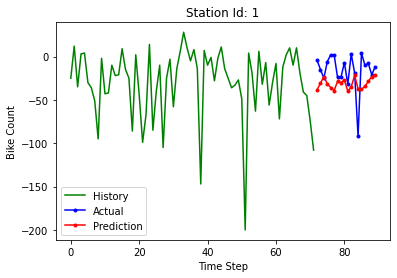

MAE: 21.641501083693438
MSE: 727.2895698429019


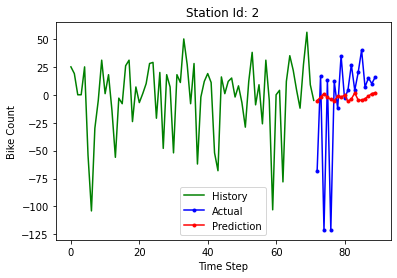

MAE: 31.42775377049033
MSE: 2179.220880487437


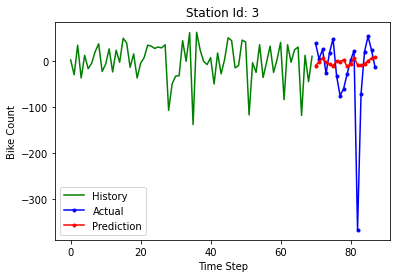

MAE: 51.5012910614816
MSE: 8566.504523489402


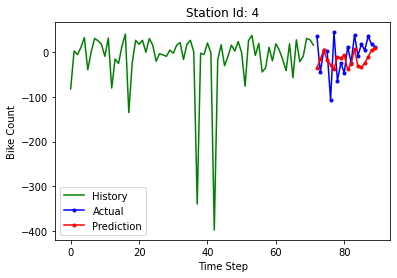

MAE: 35.252215481002644
MSE: 1867.1507358025394


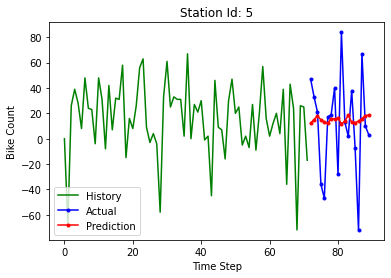

MAE: 29.946119831673457
MSE: 1509.981759130614


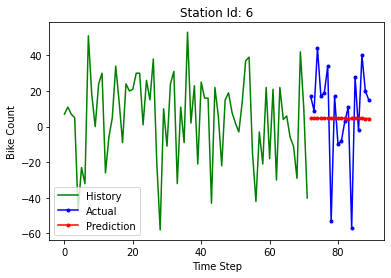

MAE: 20.577278261558565
MSE: 712.5596956771576


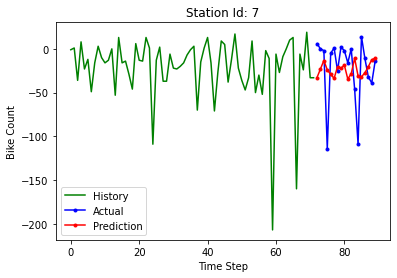

MAE: 29.526061270016882
MSE: 1369.3873657169722


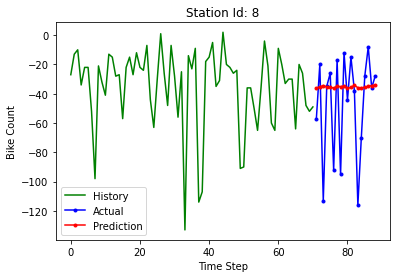

MAE: 26.12862015318334
MSE: 1301.2168445300404


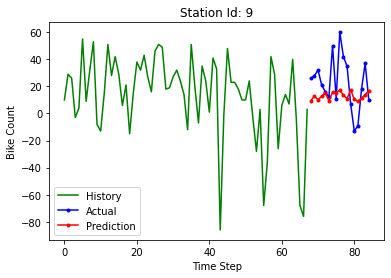

MAE: 16.958763944297782
MSE: 417.39415177745184


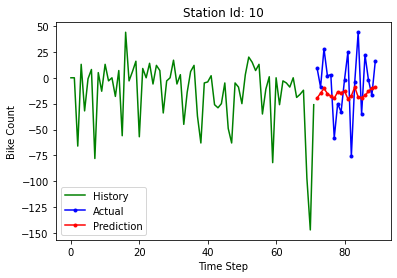

MAE: 25.521493499518876
MSE: 949.9862457791775

Error Calculation
Average MAE: 28.848109835691695
Average MSE: 1960.0691772233695


In [17]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

# empty dataframe
df_linear_pred = pd.DataFrame(columns=['prediction'])

for i in range(0, no_station):  
    X = df_3_m[i]['date'].values.reshape(-1,1) # reshape to make it two-dimentional
    y = df_3_m[i].values[:, 3:4] # Predict
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)

    # record prediction in a dataframe
    df_temp_pred = pd.DataFrame(list(y_pred))
    df_temp_pred.columns = ['temp_prediction']
    df_linear_pred = pd.concat([df_linear_pred,df_temp_pred])
    
    plot_graph(y_train, y_test, y_pred, i+1)

    ## Calculate error
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

### Robust Scaler

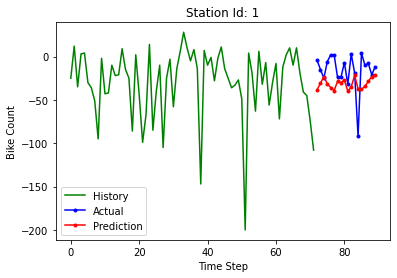

MAE: 21.641501083693438
MSE: 727.289569842902


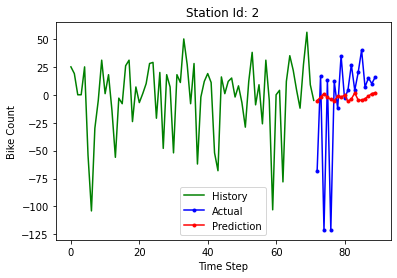

MAE: 31.42775377049033
MSE: 2179.220880487437


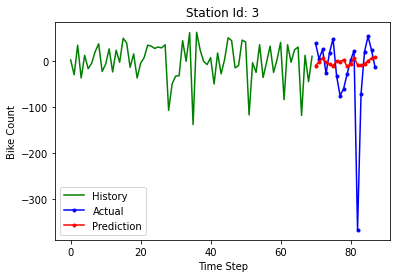

MAE: 51.5012910614816
MSE: 8566.504523489402


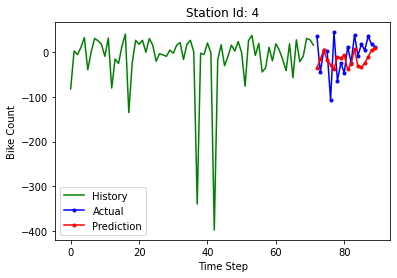

MAE: 35.252215481002644
MSE: 1867.1507358025394


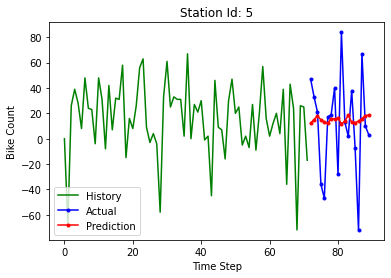

MAE: 29.94611983167345
MSE: 1509.9817591306137


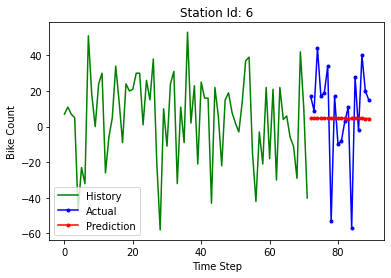

MAE: 20.577278261558565
MSE: 712.5596956771576


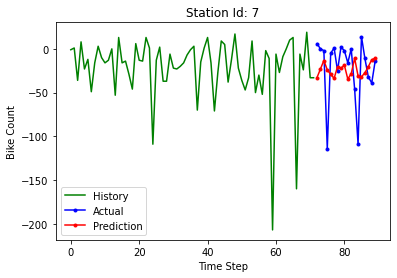

MAE: 29.526061270016882
MSE: 1369.3873657169722


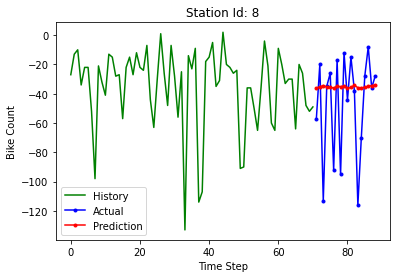

MAE: 26.12862015318334
MSE: 1301.2168445300404


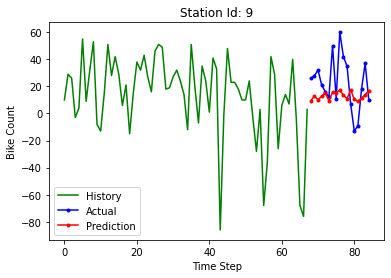

MAE: 16.958763944297786
MSE: 417.39415177745184


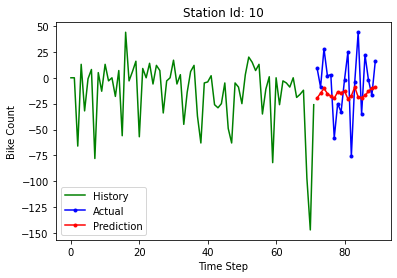

MAE: 25.52149349951888
MSE: 949.9862457791777

Error Calculation
Average MAE: 28.848109835691695
Average MSE: 1960.0691772233695


In [18]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10


for i in range(0, no_station):  
    X = df_3_m[i]['date'].values.reshape(-1,1) # reshape to make it two-dimentional
    y = df_3_m[i].values[:, 3:4] # Predict

    #PredictorScaler = StandardScaler()
    #TargetVarScaler = StandardScaler()
    
    PredictorScaler = RobustScaler()
    TargetVarScaler = RobustScaler()

    #PredictorScaler = MinMaxScaler()
    #TargetVarScaler = MinMaxScaler()
    
    PredictorScalerFit = PredictorScaler.fit(X)
    TargetVarScalerFit = TargetVarScaler.fit(y)
    
    X = PredictorScalerFit.transform(X)
    y = TargetVarScalerFit.transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    
    y_pred = regression_model.predict(X_test)
    
    y_pred = TargetVarScalerFit.inverse_transform(y_pred)
    y_test = TargetVarScalerFit.inverse_transform(y_test)
    y_train = TargetVarScalerFit.inverse_transform(y_train)
    
    plot_graph(y_train, y_test, y_pred, i+1)
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)
    
print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

### Multiple Linear Regression

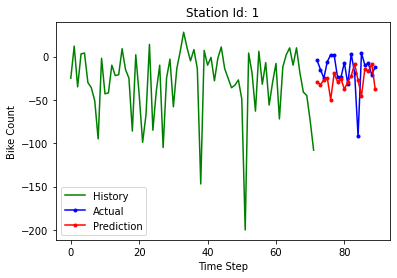

MAE: 20.949334935532207
MSE: 757.535975391593


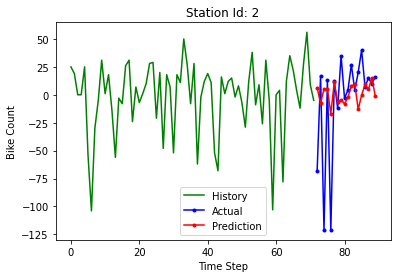

MAE: 29.38470850405872
MSE: 2123.6981755808997


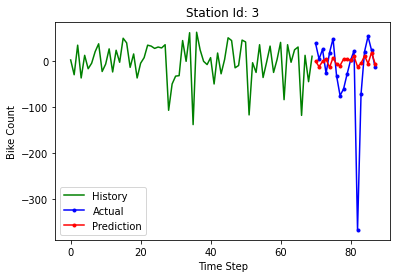

MAE: 49.18976069080427
MSE: 8305.703007870005


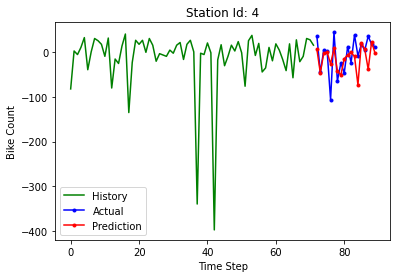

MAE: 27.207463041457647
MSE: 1331.4698931487865


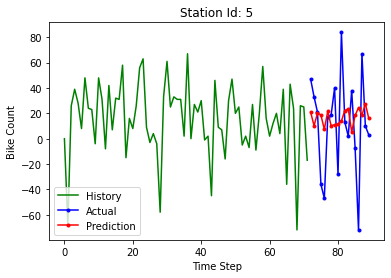

MAE: 31.94621093735686
MSE: 1608.8949179817216


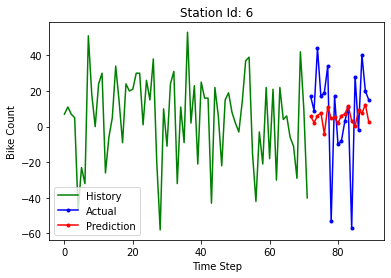

MAE: 20.14680464152719
MSE: 686.4575709618467


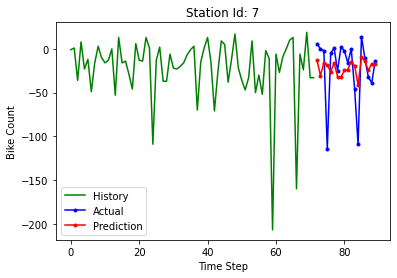

MAE: 24.23828632036584
MSE: 1094.6532223824177


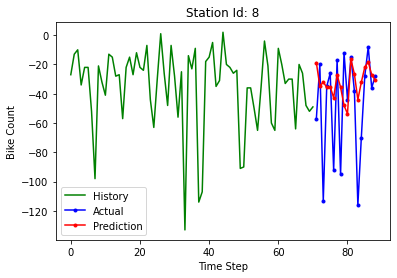

MAE: 25.50375958710445
MSE: 1264.778881153231


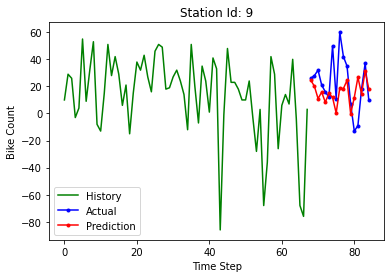

MAE: 15.010901396490484
MSE: 387.278666245145


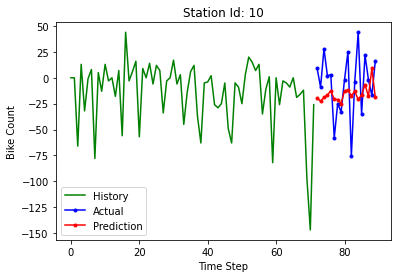

MAE: 26.512852961758686
MSE: 990.372501097112

Error Calculation
Average MAE: 27.009008301645633
Average MSE: 1855.0842811812756


In [19]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(0, no_station):  
    X = df_3_m[i].values[:, 4:8] #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df_3_m[i].values[:, 3:4] # predict
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    
    y_pred = regression_model.predict(X_test)

    plot_graph(y_train, y_test, y_pred, i+1)
    
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')
    
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

### Robust Scaler

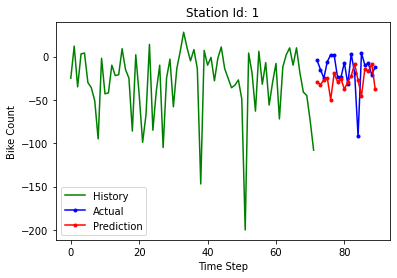

MAE: 20.949334935532203
MSE: 757.5359753915926


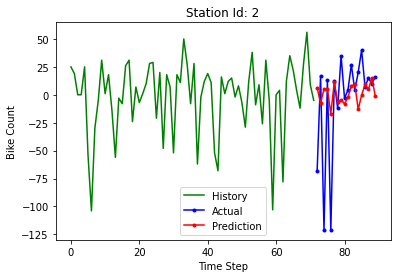

MAE: 29.384708504058715
MSE: 2123.6981755808997


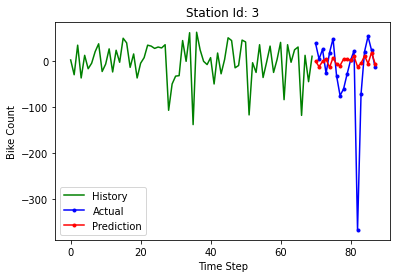

MAE: 49.189760690804256
MSE: 8305.703007870005


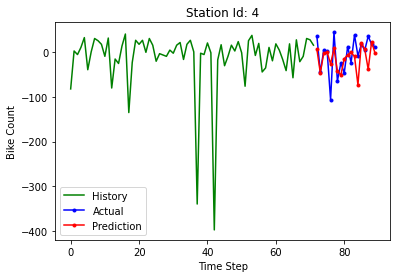

MAE: 27.207463041457654
MSE: 1331.469893148787


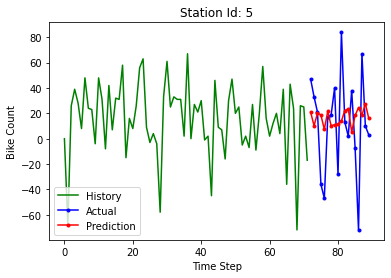

MAE: 31.94621093735686
MSE: 1608.894917981722


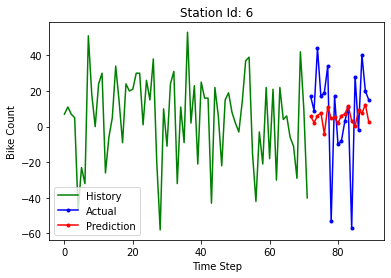

MAE: 20.14680464152719
MSE: 686.4575709618467


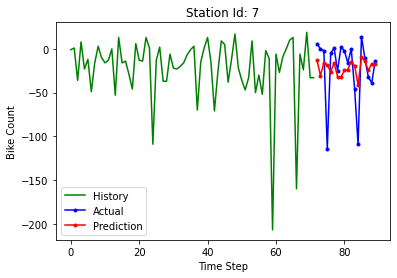

MAE: 24.238286320365837
MSE: 1094.6532223824179


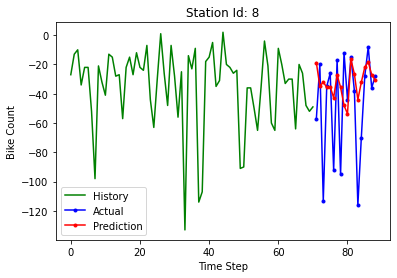

MAE: 25.503759587104454
MSE: 1264.7788811532307


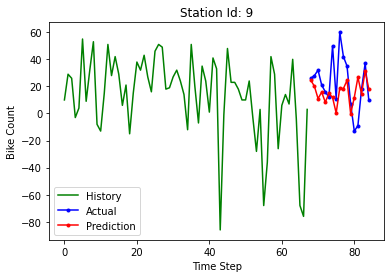

MAE: 15.010901396490445
MSE: 387.27866624514405


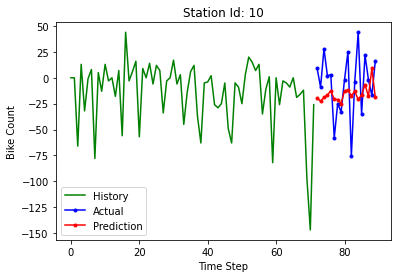

MAE: 26.512852961758693
MSE: 990.3725010971123

Error Calculation
Average MAE: 27.009008301645633
Average MSE: 1855.0842811812759


In [20]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(0, no_station):  
    X = df_3_m[i].values[:, 4:8] #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date' [:,4:8]
    y = df_3_m[i].values[:, 3:4] # Predict

    #PredictorScaler = StandardScaler()
    #TargetVarScaler = StandardScaler()
    
    PredictorScaler = RobustScaler()
    TargetVarScaler = RobustScaler()

    #PredictorScaler = MinMaxScaler()
    #TargetVarScaler = MinMaxScaler()
    
    PredictorScalerFit = PredictorScaler.fit(X)
    TargetVarScalerFit = TargetVarScaler.fit(y)
    
    X = PredictorScalerFit.transform(X)
    y = TargetVarScalerFit.transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    
    y_pred = regression_model.predict(X_test)
    
    y_pred = TargetVarScalerFit.inverse_transform(y_pred)
    y_test = TargetVarScalerFit.inverse_transform(y_test)
    y_train = TargetVarScalerFit.inverse_transform(y_train)
    
    plot_graph(y_train, y_test, y_pred, i+1)
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)
    
print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

## K fold 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


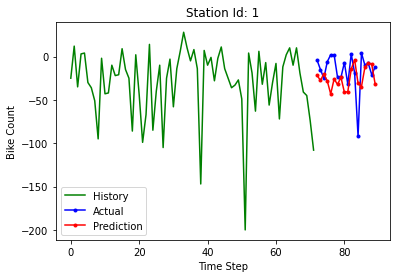

MAE: 19.387582895546885
MSE: 634.8045962615794
Fitting 5 folds for each of 5 candidates, totalling 25 fits


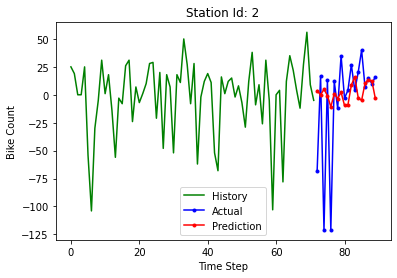

MAE: 29.710400023237508
MSE: 2140.237141847178
Fitting 5 folds for each of 5 candidates, totalling 25 fits


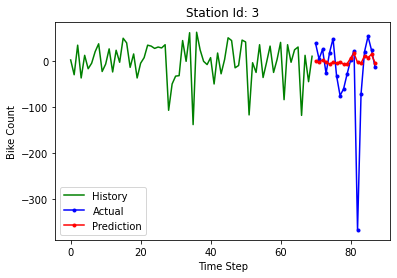

MAE: 47.55156521209407
MSE: 8530.023577523294
Fitting 5 folds for each of 5 candidates, totalling 25 fits


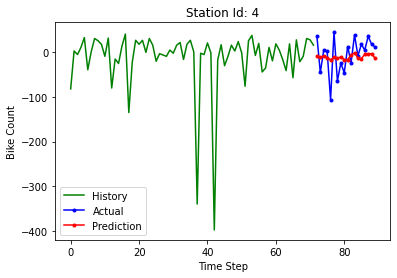

MAE: 31.287247151396983
MSE: 1376.0917712911958
Fitting 5 folds for each of 5 candidates, totalling 25 fits


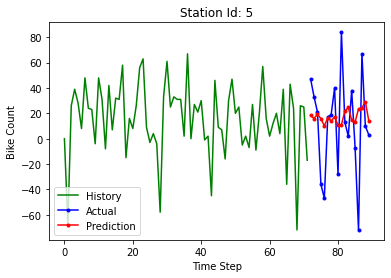

MAE: 29.994485115904507
MSE: 1523.1321299127137
Fitting 5 folds for each of 5 candidates, totalling 25 fits


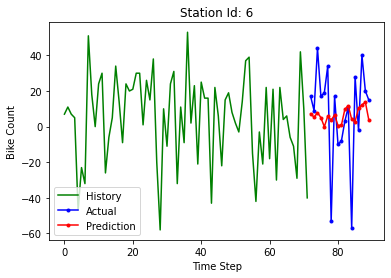

MAE: 19.262841741086778
MSE: 651.7839337038555
Fitting 5 folds for each of 5 candidates, totalling 25 fits


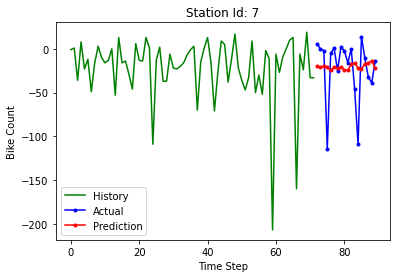

MAE: 26.73575918390293
MSE: 1283.631587634592
Fitting 5 folds for each of 5 candidates, totalling 25 fits


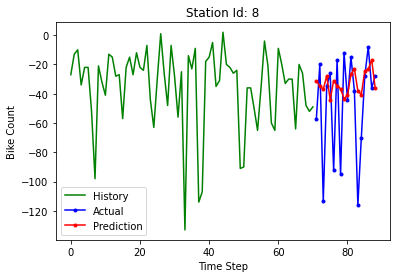

MAE: 27.40303665856691
MSE: 1303.4828960704258
Fitting 5 folds for each of 5 candidates, totalling 25 fits


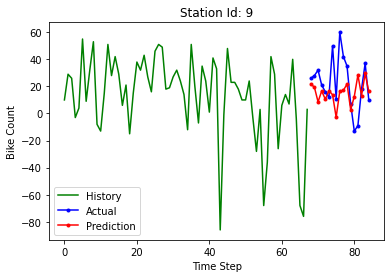

MAE: 15.775000234624526
MSE: 416.5822234318545
Fitting 5 folds for each of 5 candidates, totalling 25 fits


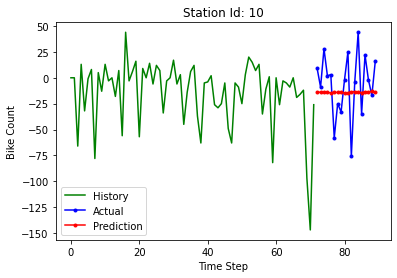

MAE: 25.60597188521467
MSE: 950.4040222240292

Error Calculation
Average MAE: 27.271389010157577
Average MSE: 1881.0173879900717


In [21]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

# empty dataframe
df_linear_pred = pd.DataFrame(columns=['prediction'])

for i in range(0, no_station):  
    X = df_3_m[i].values[:, 4:8] #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df_3_m[i].values[:, 3:4] # Predict
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # step-1: create a cross-validation scheme
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)                                           

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{'n_features_to_select': list(range(1, 6))}]


    # step-3: perform grid search
    # 3.1 specify model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    rfe = RFE(regression_model)             

    # 3.2 call GridSearchCV()
    model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

    # fit the model
    model_cv.fit(X_train, y_train)   
    y_pred = model_cv.predict(X_test)
    
    plot_graph(y_train, y_test, y_pred, i + 1)
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)
    
print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)


## Scaler

### Robust Scaler

Fitting 5 folds for each of 5 candidates, totalling 25 fits


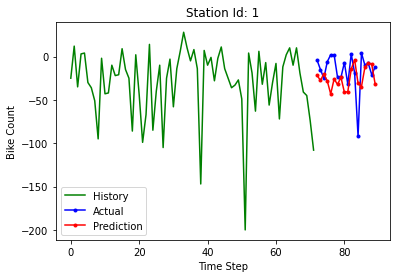

MAE: 19.38758289554689
MSE: 634.8045962615794
Fitting 5 folds for each of 5 candidates, totalling 25 fits


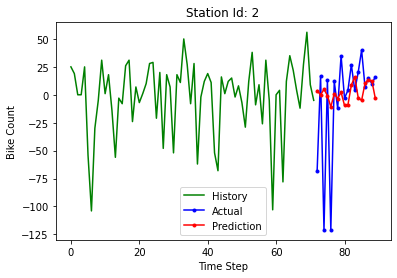

MAE: 29.710400023237508
MSE: 2140.2371418471776
Fitting 5 folds for each of 5 candidates, totalling 25 fits


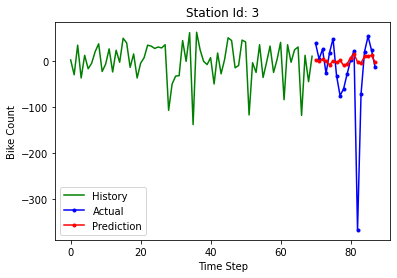

MAE: 47.722206861110635
MSE: 8568.198314534984
Fitting 5 folds for each of 5 candidates, totalling 25 fits


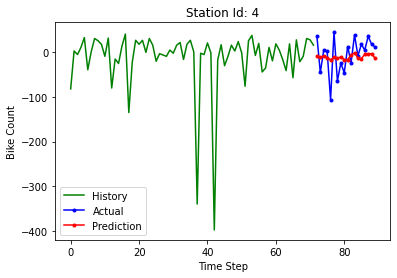

MAE: 31.287247151396983
MSE: 1376.0917712911962
Fitting 5 folds for each of 5 candidates, totalling 25 fits


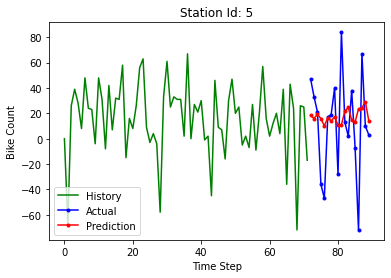

MAE: 29.994485115904507
MSE: 1523.1321299127137
Fitting 5 folds for each of 5 candidates, totalling 25 fits


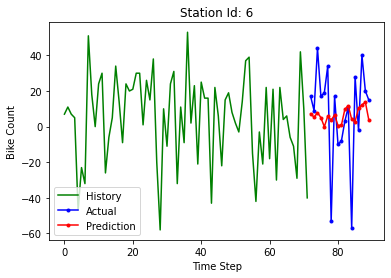

MAE: 19.262841741086778
MSE: 651.7839337038554
Fitting 5 folds for each of 5 candidates, totalling 25 fits


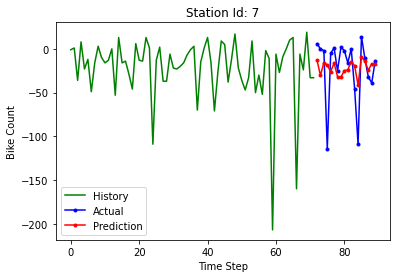

MAE: 24.21806188154622
MSE: 1092.3277298033247
Fitting 5 folds for each of 5 candidates, totalling 25 fits


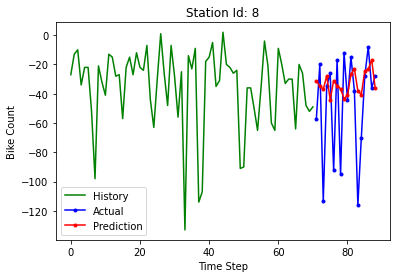

MAE: 27.40303665856691
MSE: 1303.4828960704258
Fitting 5 folds for each of 5 candidates, totalling 25 fits


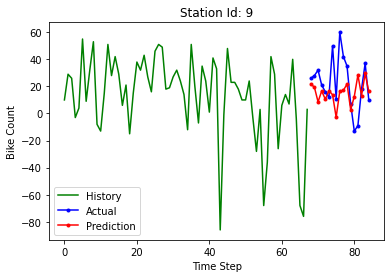

MAE: 15.775000234624516
MSE: 416.5822234318545
Fitting 5 folds for each of 5 candidates, totalling 25 fits


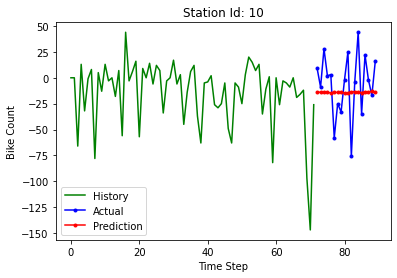

MAE: 25.60597188521467
MSE: 950.4040222240292

Error Calculation
Average MAE: 27.036683444823563
Average MSE: 1865.704475908114


In [22]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

# empty dataframe
df_linear_pred = pd.DataFrame(columns=['prediction'])

for i in range(0, no_station):  
    X = df_3_m[i].values[:, 4:8] #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df_3_m[i].values[:, 3:4] # Predict

    #PredictorScaler = StandardScaler()
    #TargetVarScaler = StandardScaler()
    
    PredictorScaler = RobustScaler()
    TargetVarScaler = RobustScaler()

    #PredictorScaler = MinMaxScaler()
    #TargetVarScaler = MinMaxScaler()
    
    PredictorScalerFit = PredictorScaler.fit(X)
    TargetVarScalerFit = TargetVarScaler.fit(y)
    X = PredictorScalerFit.transform(X)
    y = TargetVarScalerFit.transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # step-1: create a cross-validation scheme
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)                                           

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{'n_features_to_select': list(range(1, 6))}]


    # step-3: perform grid search
    # 3.1 specify model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    rfe = RFE(regression_model)             

    # 3.2 call GridSearchCV()
    model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

    # fit the model
    model_cv.fit(X_train, y_train)   
    y_pred = model_cv.predict(X_test)
    
    y_pred = TargetVarScalerFit.inverse_transform(y_pred)
    y_test = TargetVarScalerFit.inverse_transform(y_test)
    y_train = TargetVarScalerFit.inverse_transform(y_train)
    
    plot_graph(y_train, y_test, y_pred, i+1)
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)
    
print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

- https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
- https://realpython.com/linear-regression-in-python/

# Random Forest Regression

- For random forest regression and extra tree regression, X = name_of_dataset[i].values[:, 0:11] is used as the feature selection is applied during the training.

/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1622096315.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


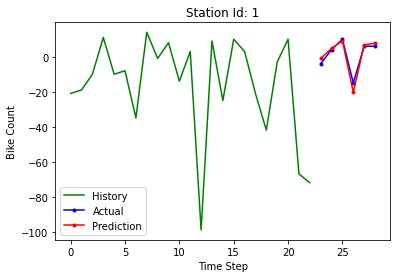

MAE: 2.0833333333333335
MSE: 7.140625


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1622096315.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


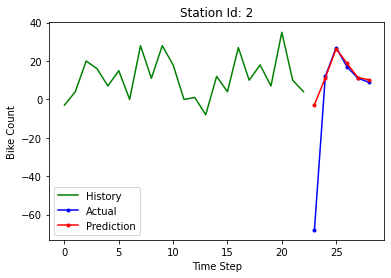

MAE: 11.666666666666666
MSE: 710.546875


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1622096315.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


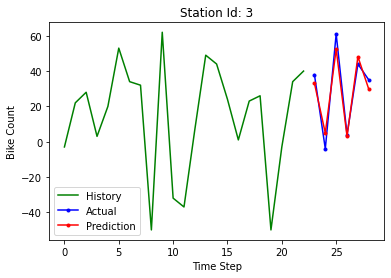

MAE: 5.4375
MSE: 36.7265625


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1622096315.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


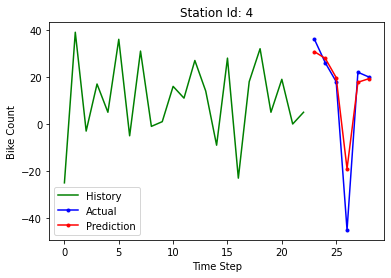

MAE: 6.645833333333333
MSE: 121.4609375


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1622096315.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


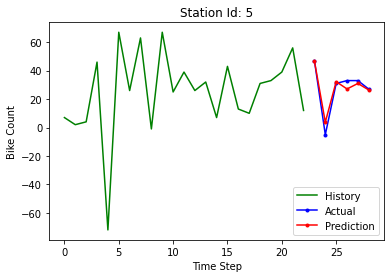

MAE: 3.125
MSE: 19.515625


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1622096315.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


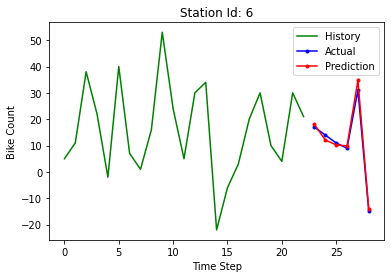

MAE: 1.5416666666666667
MSE: 3.484375


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1622096315.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


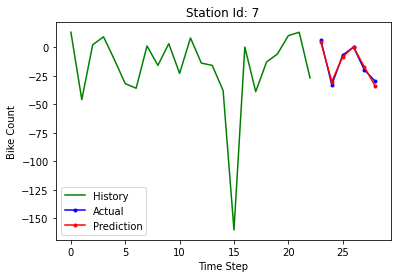

MAE: 2.1666666666666665
MSE: 6.276041666666667


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1622096315.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


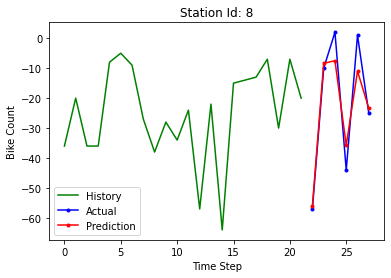

MAE: 5.6875
MSE: 51.4765625


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1622096315.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


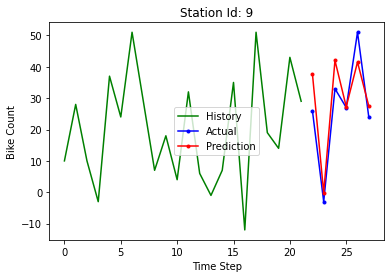

MAE: 6.145833333333333
MSE: 54.981770833333336


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1622096315.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


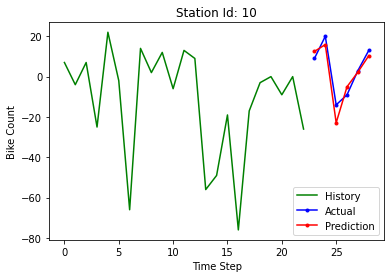

MAE: 3.9791666666666665
MSE: 21.9140625

Error Calculation
Average MAE: 4.847916666666666
Average MSE: 103.35234375


In [26]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(0, no_station):  
    X = df_1_m[i].values[:, 0:11] # For all of the features in this data set  
    y = df_1_m[i].values[:, 3:4] # Predict
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    randomForest_model = RandomForestRegressor(n_estimators=8)
    randomForest_model.fit(X_train, y_train)
    
    y_pred = randomForest_model.predict(X_test)
    
    plot_graph(y_train, y_test, y_pred, i + 1)
    
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1074404168.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


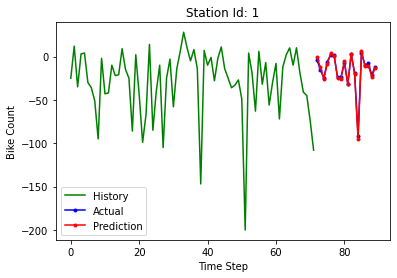

MAE: 1.6319444444444444
MSE: 3.521701388888889


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1074404168.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


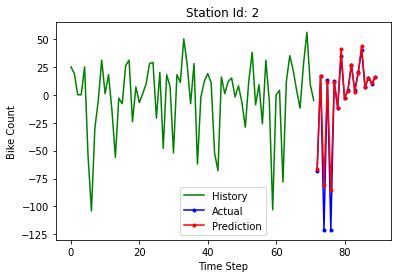

MAE: 5.125
MSE: 162.09027777777777


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1074404168.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


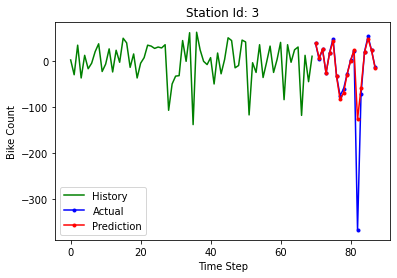

MAE: 16.3125
MSE: 3205.0147569444443


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1074404168.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


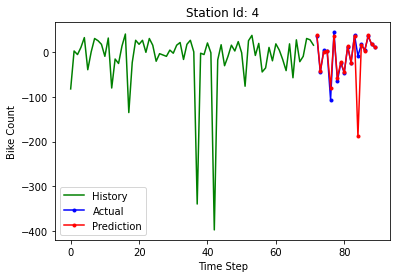

MAE: 13.458333333333334
MSE: 1857.8003472222222


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1074404168.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


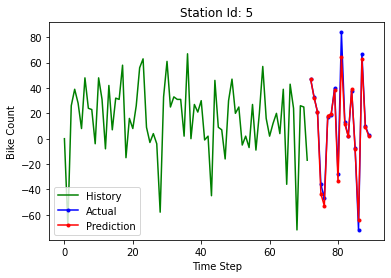

MAE: 3.3680555555555554
MSE: 33.122395833333336


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1074404168.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


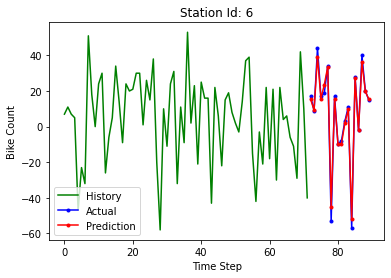

MAE: 2.0625
MSE: 9.004340277777779


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1074404168.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


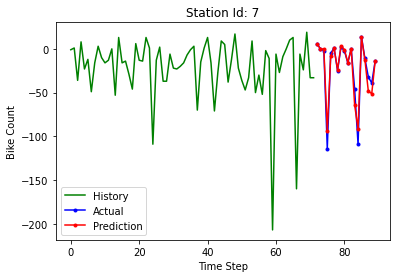

MAE: 5.409722222222222
MSE: 82.6796875


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1074404168.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


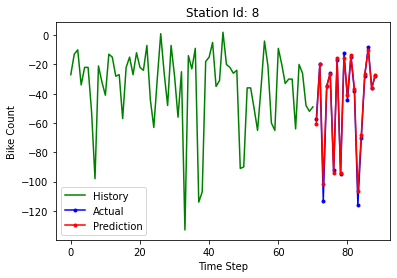

MAE: 2.5416666666666665
MSE: 15.394097222222221


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1074404168.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


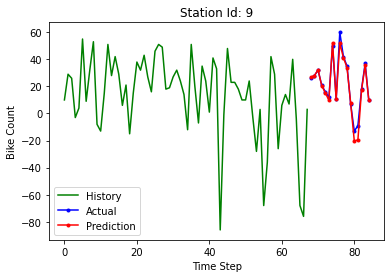

MAE: 2.235294117647059
MSE: 14.5625


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1074404168.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


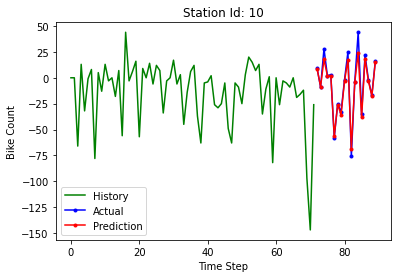

MAE: 3.5347222222222223
MSE: 35.481770833333336

Error Calculation
Average MAE: 5.56797385620915
Average MSE: 541.8671874999999


In [27]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(0, no_station):  
    X = df_3_m[i].values[:, 0:11] # For all of the features in this data set 
    y = df_3_m[i].values[:, 3:4] # Predict
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    randomForest_model = RandomForestRegressor(n_estimators=8)
    randomForest_model.fit(X_train, y_train)
    
    y_pred = randomForest_model.predict(X_test)
    
    plot_graph(y_train, y_test, y_pred, i + 1)
    
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1454185825.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


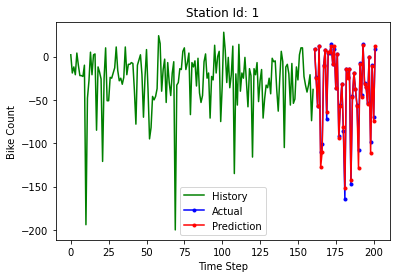

MAE: 2.942073170731707
MSE: 31.738948170731707


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1454185825.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


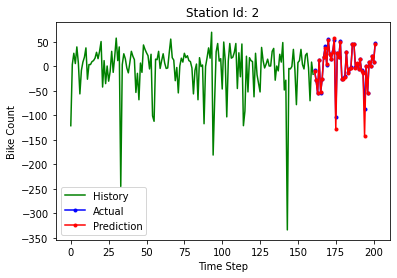

MAE: 2.7103658536585367
MSE: 88.7328506097561


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1454185825.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


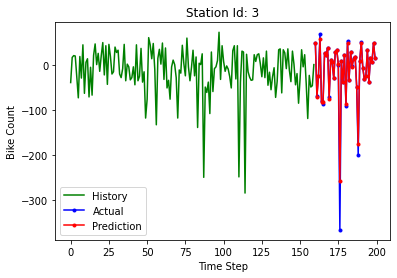

MAE: 4.640625
MSE: 320.349609375


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1454185825.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


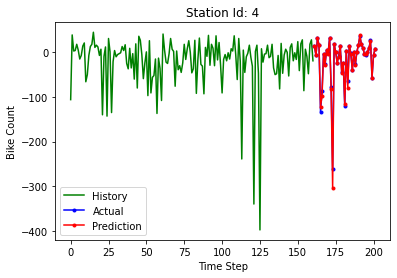

MAE: 2.597560975609756
MSE: 58.109756097560975


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1454185825.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


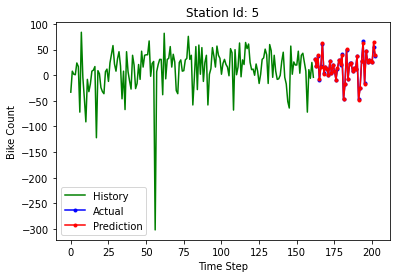

MAE: 0.9573170731707317
MSE: 3.4375


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1454185825.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


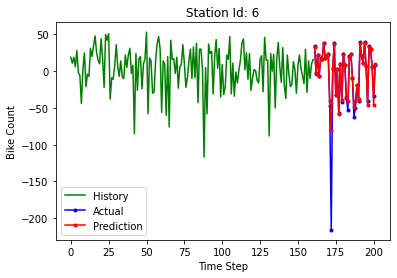

MAE: 5.295731707317073
MSE: 463.719131097561


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1454185825.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


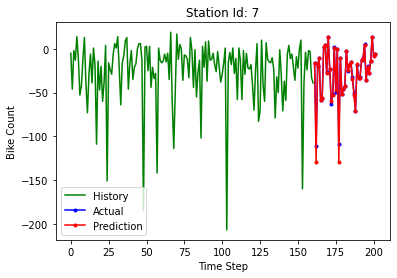

MAE: 1.4451219512195121
MSE: 18.794969512195124


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1454185825.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


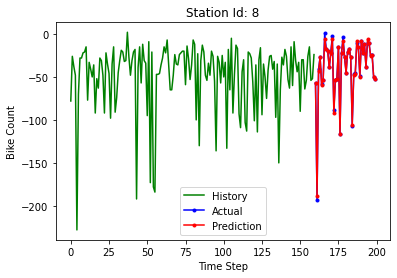

MAE: 1.021875
MSE: 3.622265625


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1454185825.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


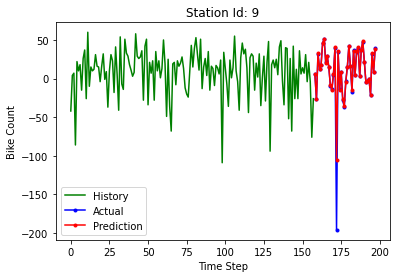

MAE: 2.85625
MSE: 208.23828125


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1454185825.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


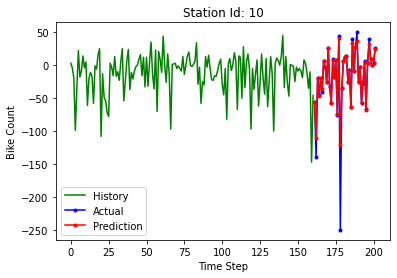

MAE: 5.094512195121951
MSE: 431.5262957317073

Error Calculation
Average MAE: 2.9561432926829267
Average MSE: 162.82696074695122


In [28]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(0, no_station):  
    X = df_6_m[i].values[:, 0:11] # For all of the features in this data set 
    y = df_6_m[i].values[:, 3:4] # Predict
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    randomForest_model = RandomForestRegressor(n_estimators=8)
    randomForest_model.fit(X_train, y_train)
    
    y_pred = randomForest_model.predict(X_test)
    
    plot_graph(y_train, y_test, y_pred, i + 1)
    
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

# Extra  Tree Regression

/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2614152538.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


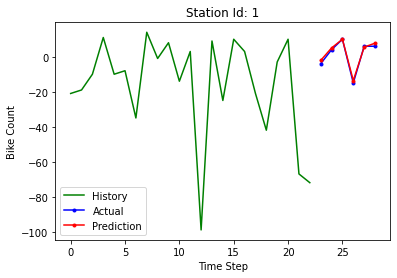

MAE: 1.0833333333333333
MSE: 1.6197916666666667


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2614152538.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


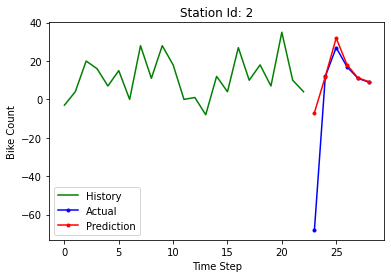

MAE: 11.291666666666666
MSE: 627.0677083333334


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2614152538.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


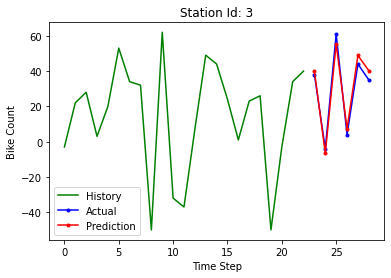

MAE: 3.9375
MSE: 17.4609375


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2614152538.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


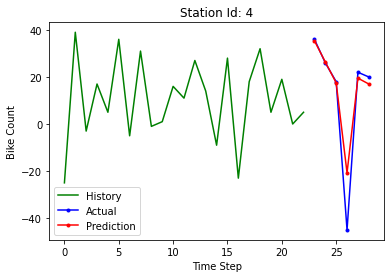

MAE: 5.208333333333333
MSE: 100.68229166666667


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2614152538.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


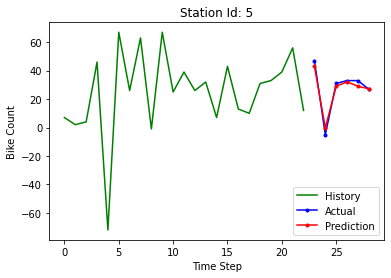

MAE: 2.625
MSE: 9.734375


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2614152538.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


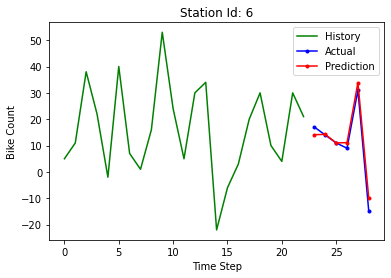

MAE: 2.1875
MSE: 7.684895833333333


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2614152538.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


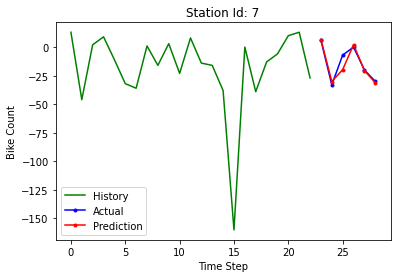

MAE: 3.3541666666666665
MSE: 29.591145833333332


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2614152538.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


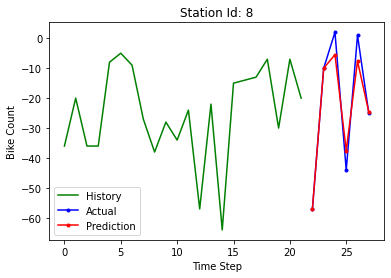

MAE: 3.8333333333333335
MSE: 28.838541666666668


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2614152538.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


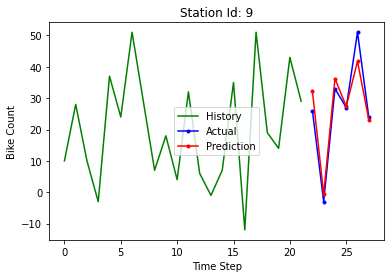

MAE: 3.7291666666666665
MSE: 23.622395833333332


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2614152538.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


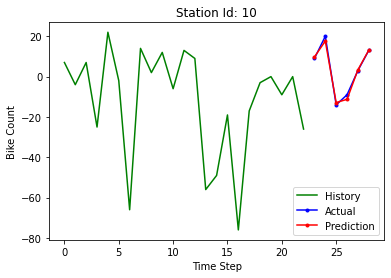

MAE: 1.1666666666666667
MSE: 2.1145833333333335

Error Calculation
Average MAE: 3.8416666666666663
Average MSE: 84.84166666666667


In [23]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(0, no_station):  
    X = df_1_m[i].values[:, 0:11] # For all of the features in this data set 
    y = df_1_m[i].values[:, 3:4] # predict
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    extraTree_model = ExtraTreesRegressor(n_estimators=8)
    extraTree_model.fit(X_train, y_train)
    
    y_pred = extraTree_model.predict(X_test)
    
    plot_graph(y_train, y_test, y_pred, i + 1)
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1647101049.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


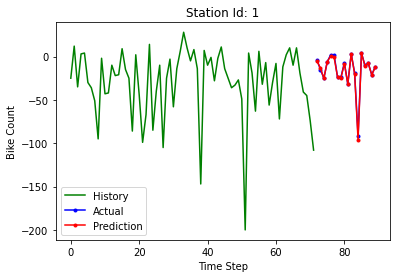

MAE: 0.9722222222222222
MSE: 2.060763888888889


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1647101049.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


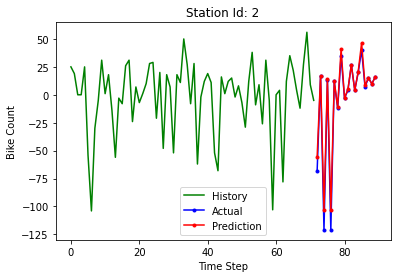

MAE: 3.6875
MSE: 47.51128472222222


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1647101049.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


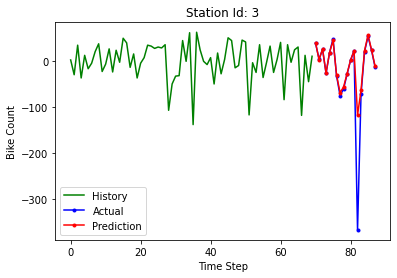

MAE: 15.979166666666666
MSE: 3443.8342013888887


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1647101049.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


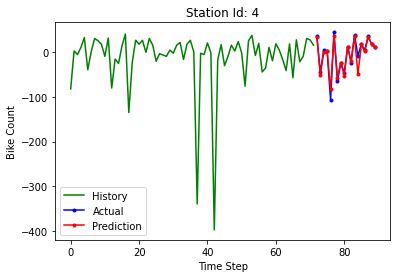

MAE: 6.180555555555555
MSE: 139.22743055555554


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1647101049.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


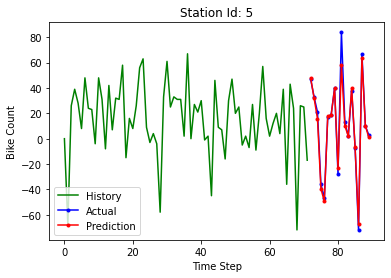

MAE: 3.3472222222222223
MSE: 44.25868055555556


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1647101049.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


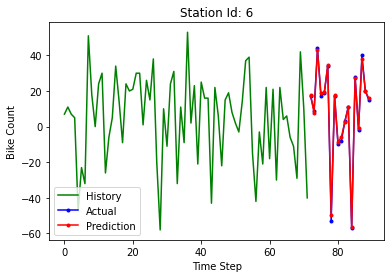

MAE: 1.0902777777777777
MSE: 1.8932291666666667


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1647101049.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


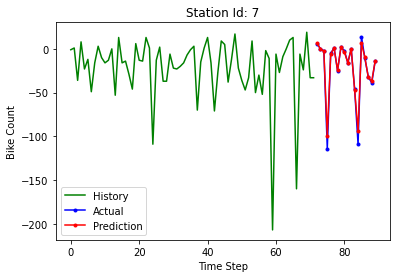

MAE: 2.576388888888889
MSE: 28.233506944444443


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1647101049.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


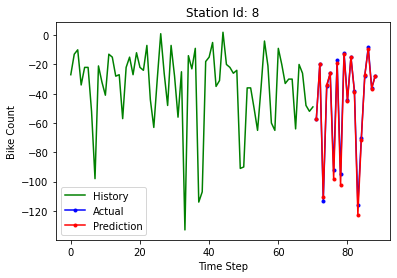

MAE: 1.8611111111111112
MSE: 8.961805555555555


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1647101049.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


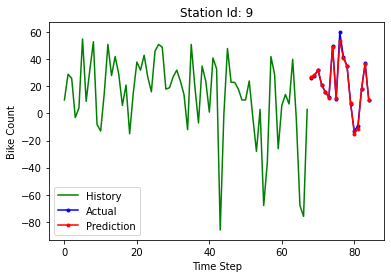

MAE: 0.9044117647058824
MSE: 3.114889705882353


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1647101049.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


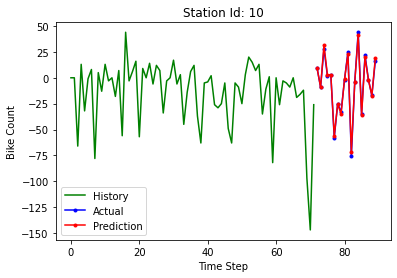

MAE: 1.4444444444444444
MSE: 3.9270833333333335

Error Calculation
Average MAE: 3.804330065359477
Average MSE: 372.3022875816994


In [24]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(0, no_station):  
    X = df_3_m[i].values[:, 0:11] # For all of the features in this data set 
    y = df_3_m[i].values[:, 3:4] # predict
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    extraTree_model = ExtraTreesRegressor(n_estimators=8)
    extraTree_model.fit(X_train, y_train)
    
    y_pred = extraTree_model.predict(X_test)
    
    plot_graph(y_train, y_test, y_pred, i + 1)
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2277564828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


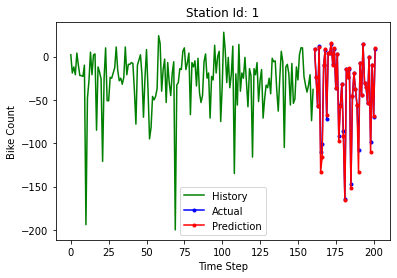

MAE: 2.6189024390243905
MSE: 38.95769817073171


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2277564828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


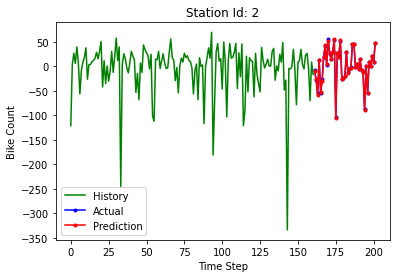

MAE: 0.8323170731707317
MSE: 1.8304115853658536


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2277564828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


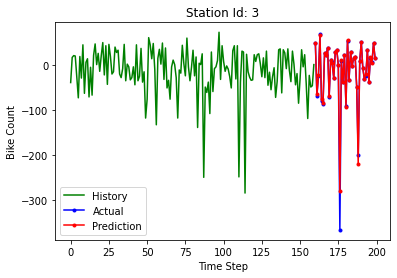

MAE: 3.50625
MSE: 199.23671875


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2277564828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


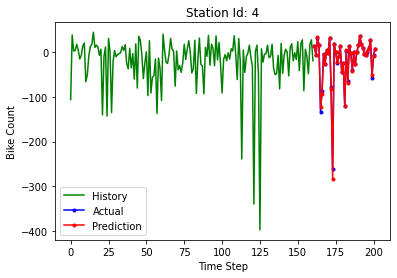

MAE: 1.774390243902439
MSE: 19.659298780487806


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2277564828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


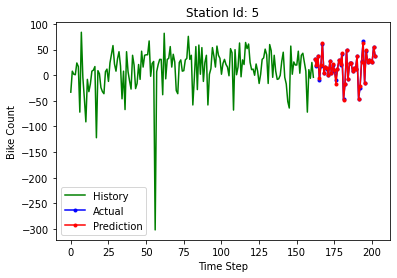

MAE: 0.8140243902439024
MSE: 2.345655487804878


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2277564828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


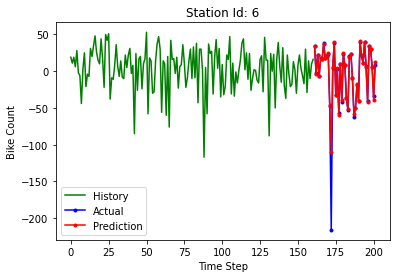

MAE: 3.481707317073171
MSE: 277.4451219512195


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2277564828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


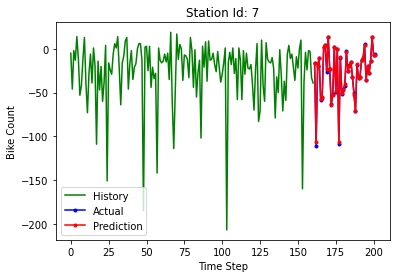

MAE: 0.7073170731707317
MSE: 1.3689024390243902


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2277564828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


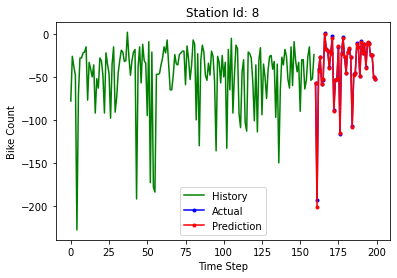

MAE: 0.83125
MSE: 2.66796875


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2277564828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


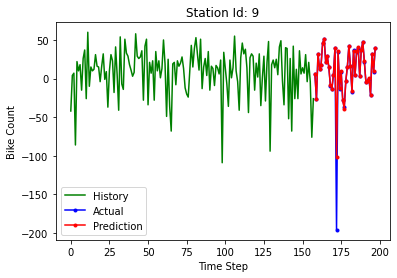

MAE: 2.728125
MSE: 225.318359375


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/2277564828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


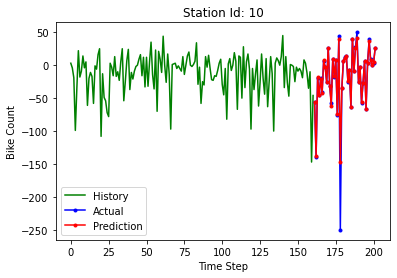

MAE: 3.524390243902439
MSE: 262.3673780487805

Error Calculation
Average MAE: 2.08186737804878
Average MSE: 103.11975133384146


In [25]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(0, no_station):  
    X = df_6_m[i].values[:, 0:11] # For all of the features in this data set 
    y = df_6_m[i].values[:, 3:4] # predict
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    extraTree_model = ExtraTreesRegressor(n_estimators=8)
    extraTree_model.fit(X_train, y_train)
    
    y_pred = extraTree_model.predict(X_test)
    
    plot_graph(y_train, y_test, y_pred, i + 1)
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)


### Feature selection

In [32]:
def select_features(X_train, y_train, X_test):
    feature_selection = SelectKBest(score_func = mutual_info_regression, k = 4)
    
    feature_selection.fit(X_train, y_train)
    X_train_fs = feature_selection.transform(X_train)
    X_test_fs = feature_selection.transform(X_test)
    
    return X_train_fs, X_test_fs, feature_selection

[0.0061832  0.41317852 0.57775874 0.00287955]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1962906084.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


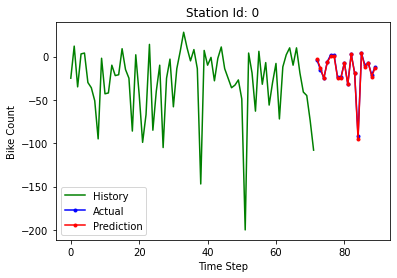

/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 1.0347222222222223
MSE: 1.8133680555555556
[0.29619869 0.7007595  0.00145899 0.00158282]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1962906084.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


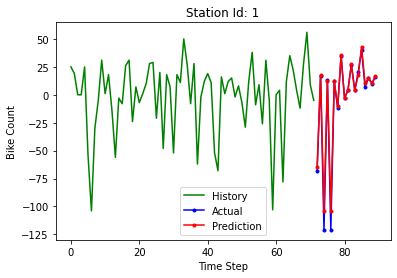

/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 2.8541666666666665
MSE: 35.099826388888886
[0.05642247 0.21206649 0.72780275 0.00370829]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1962906084.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


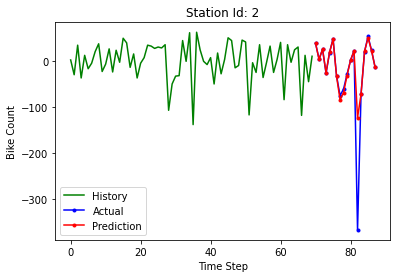

MAE: 15.256944444444445
MSE: 3289.7196180555557
[0.01822067 0.51146102 0.46948456 0.00083375]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1962906084.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


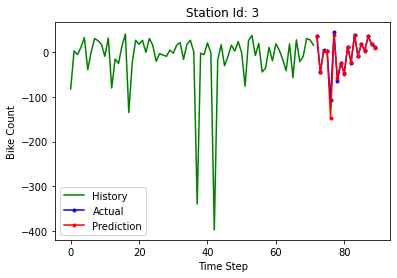

MAE: 3.5902777777777777
MSE: 100.11197916666667
[0.00432435 0.27305481 0.71984494 0.00277591]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1962906084.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


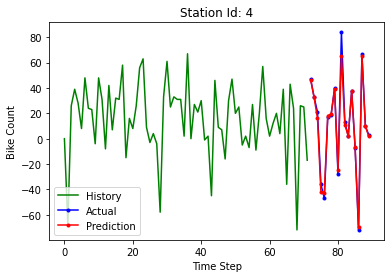

MAE: 2.6597222222222223
MSE: 25.09982638888889
[0.16069536 0.83540412 0.00203003 0.00187049]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1962906084.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


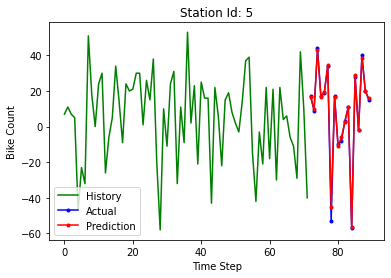

MAE: 1.0138888888888888
MSE: 4.059027777777778
[0.43928456 0.55176083 0.00373942 0.00521519]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1962906084.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


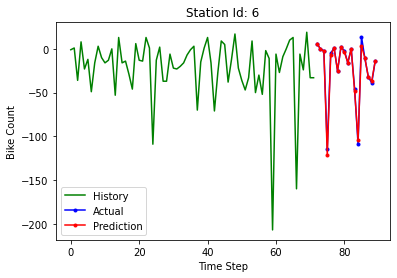

MAE: 1.8402777777777777
MSE: 11.66579861111111
[0.51517015 0.47901366 0.00311077 0.00270542]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1962906084.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


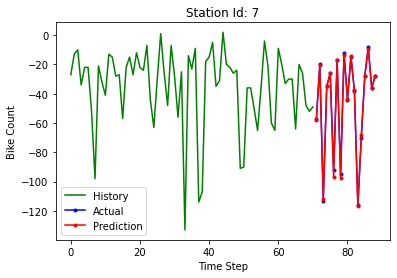

MAE: 0.9027777777777778
MSE: 2.111111111111111


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.20221898 0.79457511 0.00099302 0.0022129 ]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1962906084.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


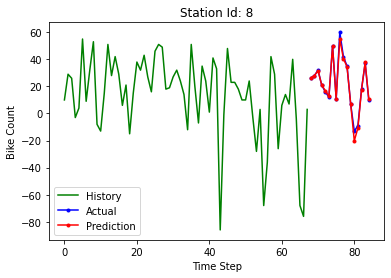

MAE: 1.213235294117647
MSE: 4.9494485294117645
[0.00510771 0.20439244 0.78395149 0.00654836]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5582/1962906084.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


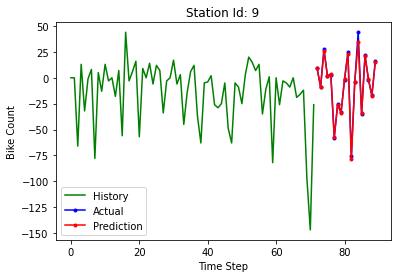

MAE: 1.4583333333333333
MSE: 6.815972222222222

Error Calculation
Average MAE: 3.182434640522876
Average MSE: 348.144597630719


In [33]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(0, no_station):  
    X = df_3_m[i].values[:, 0:11] # For all of the features in this data set 
    y = df_3_m[i].values[:, 3:4] # Predict
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # feature selection
    X_train_fs, X_test_fs, feature_selection = select_features(X_train, y_train, X_test)
    
    extraTree_model = ExtraTreesRegressor(n_estimators=8)
    extraTree_model.fit(X_train_fs, y_train)
    print(extraTree_model.feature_importances_)
        
    for feat, importance in zip(df_3_m[i].columns, extraTree_model.feature_importances_):
        print ('feature: ',feat) 
    
    y_pred = extraTree_model.predict(X_test_fs)
    
    plot_graph(y_train, y_test, y_pred, i)

    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)